In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import linalg
import copy
import iMPS
from scipy.sparse import linalg
import funcs
from scipy.optimize import bisect

In [2]:
X = np.array([[0,1],[1,0]])
Id = np.eye(2)
X1234 = np.zeros([1,1,16,16])
X1234[0,0,:,:] = np.kron(X,np.kron(X,np.kron(X,X)))
X12 = np.zeros([1,1,16,16])
X12[0,0,:,:] = np.kron(X,np.kron(X,np.kron(Id,Id)))

X14= np.zeros([1,1,16,16])
X14[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(Id,X)))

X13= np.zeros([1,1,16,16])
X13[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(X,Id)))

X24= np.zeros([1,1,16,16])
X24[0,0,:,:] = np.kron(Id,np.kron(X,np.kron(Id,X)))

X23= np.zeros([1,1,16,16])
X23[0,0,:,:] = np.kron(Id,np.kron(X,np.kron(X,Id)))

X34= np.zeros([1,1,16,16])
X34[0,0,:,:] = np.kron(Id,np.kron(Id,np.kron(X,X)))


X1 = np.zeros([1,1,16,16])
X1[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(Id,Id)))


X2 = np.zeros([1,1,16,16])
X2[0,0,:,:] = np.kron(Id,np.kron(X,np.kron(Id,Id)))


X4 = np.zeros([1,1,16,16])
X4[0,0,:,:] = np.kron(Id,np.kron(Id,np.kron(Id,X)))


MPO1234 = iMPS.iMPO()
MPO1234.construct_from_tensor_list([X1234,X1234])

MPO14 = iMPS.iMPO()
MPO14.construct_from_tensor_list([X14,X14])

MPO13 = iMPS.iMPO()
MPO13.construct_from_tensor_list([X13,X13])

MPO12 = iMPS.iMPO()
MPO12.construct_from_tensor_list([X12,X12])

MPO1 = iMPS.iMPO()
MPO1.construct_from_tensor_list([X1,X1])

MPO2 = iMPS.iMPO()
MPO2.construct_from_tensor_list([X2,X2])


MPO4 = iMPS.iMPO()
MPO4.construct_from_tensor_list([X4,X4])


MPO23 = iMPS.iMPO()
MPO23.construct_from_tensor_list([X23,X23])

MPO24 = iMPS.iMPO()
MPO24.construct_from_tensor_list([X24,X24])

MPO34 = iMPS.iMPO()
MPO34.construct_from_tensor_list([X34,X34])

X123 = np.zeros([1,1,16,16])
X123[0,0,:,:] = np.kron(X,np.kron(X,np.kron(X,Id)))
MPO123 = iMPS.iMPO()
MPO123.construct_from_tensor_list([X123,X123])




In [4]:
lam1ss=[]
lam2ss=[]
lam12ss=[]
lam13ss=[]
lam14ss=[]
lam34ss=[]
lam24ss=[]
lam23ss=[]
lam1234ss=[]
dims=[]

Z = np.array([[1,0],[0,-1]])
X = np.array([[0,1],[1,0]])
A1 = np.array([[0.3,0.4],[0.1,0.2]])
A2 = np.array([[0.2,0.1],[0.3,0.4]])
B = np.zeros([1,1,16])
A = np.array([[0.5,0.1],[0.2,-0.3]])
B[0,0] =(linalg.expm(0.1*np.kron(A,A1))).reshape([16,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 15
MPS.construct_from_tensor_list([B,B])

rng = np.arange(0.0,0.71,0.02)
for p1 in np.arange(0.,.01,0.05): 
    lam1s=[]
    lam12s=[]
    lam13s=[]
    lam14s=[]
    lam1234s=[]
    lam34s=[]
    lam24s=[]
    lam23s=[]
    lam2s=[]
    
    
    for p2 in rng:
        trans = funcs.single_trans_2layers(p1=p2,channel1='xzf_flip',p2=p2,channel2='xzf_flip')
        #trans = funcs.single_trans_2layers_df(h=p2,f1="X",f2="X",perm=False)
        #trans = funcs.single_trans_2layers_swap(p1=p1,p2=p2,channel='x_flip')
        MPO = iMPS.iMPO()
        MPO.construct_from_tensor_list([trans,trans])

        MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=15)
        MPS_power2.update(100,1e-6,1e-8)  
        
        dims.append(MPS_power2.MPS2.chi[0])
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
        lam12 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
        lam13 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)
        lam14 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO1234,MPS_power2.MPS2)
        lam1234 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO1,MPS_power2.MPS2)
        lam1 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO2,MPS_power2.MPS2)
        lam2 = strap.calculate_eig()
        
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO24,MPS_power2.MPS2)
        lam24 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO34,MPS_power2.MPS2)
        lam34 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO23,MPS_power2.MPS2)
        lam23 = strap.calculate_eig()
    
        lam12s.append(lam12)
        lam13s.append(lam13)
        lam14s.append(lam14)
        lam1234s.append(lam1234)
        lam1s.append(lam1)
        lam2s.append(lam2)
        lam34s.append(lam34)
        lam24s.append(lam24)
        lam23s.append(lam23)
        print(p2)

    lam12ss.append(lam12s)
    lam13ss.append(lam13s)
    lam14ss.append(lam14s)
    lam1234ss.append(lam1234s)
    lam1ss.append(lam1s)
    lam2ss.append(lam2s)
    lam34ss.append(lam34s)
    lam24ss.append(lam24s)
    lam23ss.append(lam23s)
  

0.0
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.52
0.54
0.56
0.58
0.6
0.62
0.64
0.66
0.68
0.7000000000000001


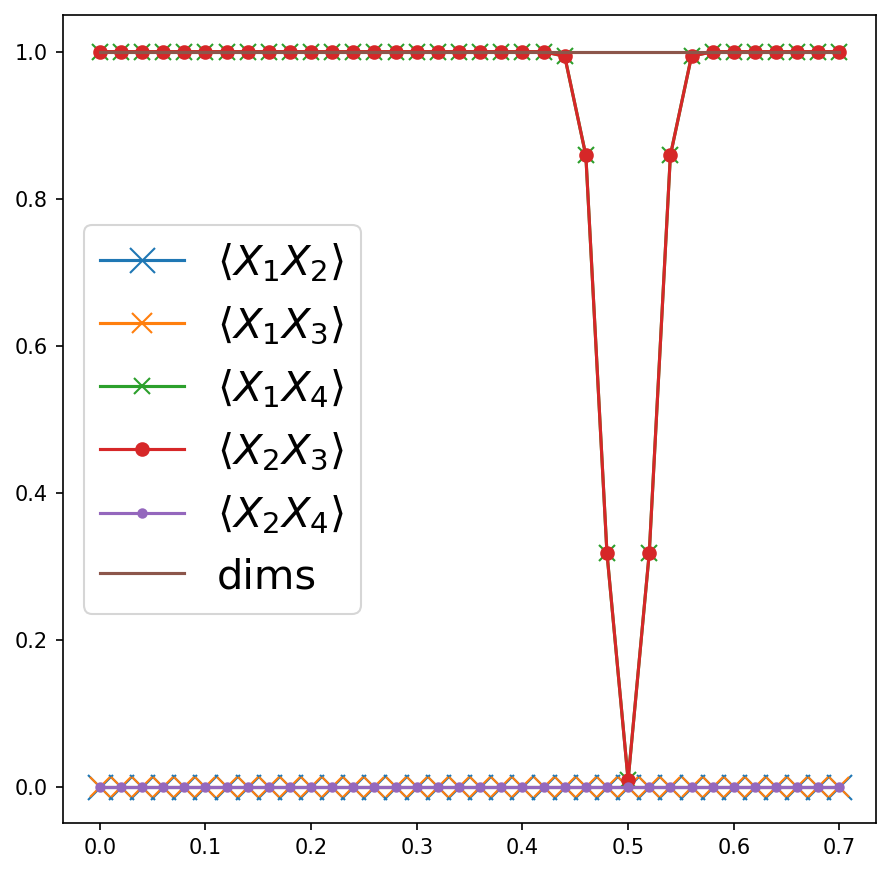

In [5]:
pyplot.figure(figsize=(7,7),dpi=150)
#pyplot.plot(rng,lam1234s,'.',label='$\langle X_1X_2X_3X_4 \\rangle$')

#pyplot.plot(rng,np.abs(lam1s),'X-',label='$\langle X_1 \\rangle$',markersize=10)
#pyplot.plot(rng,np.abs(lam2s),'X-',label='$\langle X_2 \\rangle$',markersize=6)


pyplot.plot(rng,np.abs(lam12s),'x-',label='$\langle X_1X_2 \\rangle$',markersize=12)
pyplot.plot(rng,np.abs(lam13s),'x-',label='$\langle X_1X_3 \\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam14s),'x-',label='$\langle X_1X_4 \\rangle$',markersize=8)


pyplot.plot(rng,np.abs(lam23s),'o-',label='$\langle X_2X_3 \\rangle$',markersize=6)
pyplot.plot(rng,np.abs(lam24s),'o-',label='$\langle X_2X_4 \\rangle$',markersize=4)
pyplot.plot(rng,dims,'-',label='dims',markersize=4)

#pyplot.plot(rng,[1]*len(rng))
#pyplot.plot(rng[-25:],k*np.array(rng[-25:])+d,label='3.3399*p - 0.68003')
pyplot.legend(prop={'size':20})
pyplot.show()

In [ ]:
lam1ss=[]
lam2ss=[]
lam12ss=[]
lam13ss=[]
lam14ss=[]
lam34ss=[]
lam24ss=[]
lam23ss=[]
lam1234ss=[]
dims=[]

Z = np.array([[1,0],[0,-1]])
X = np.array([[0,1],[1,0]])
A1 = np.array([[0.3,0.4],[0.1,0.2]])
A2 = np.array([[0.2,0.1],[0.3,0.4]])
B = np.zeros([1,1,16])
B[0,0] =(linalg.expm(0.1*np.kron(Z+A1,Z+A2))).reshape([16,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 15
MPS.construct_from_tensor_list([B,B])

rng = np.arange(0.6,0.75,0.005)
for p1 in np.arange(0.,.01,0.05): 
    lam1s=[]
    lam12s=[]
    lam13s=[]
    lam14s=[]
    lam1234s=[]
    lam34s=[]
    lam24s=[]
    lam23s=[]
    lam2s=[]
    
    
    for p2 in rng:
        trans = funcs.single_trans_2layers(p1=p2,channel1='deamp',p2=0,channel2='deamp')
        #trans = funcs.single_trans_2layers_df(h=p2,f1="X",f2="X",perm=False)
        #trans = funcs.single_trans_2layers_swap(p1=p1,p2=p2,channel='x_flip')
        MPO = iMPS.iMPO()
        MPO.construct_from_tensor_list([trans,trans])

        MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=15)
        MPS_power2.update(100,1e-5,1e-6)  
        
        dims.append(MPS_power2.MPS2.chi[0])
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
        lam12 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
        lam13 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)
        lam14 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO1234,MPS_power2.MPS2)
        lam1234 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO1,MPS_power2.MPS2)
        lam1 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO2,MPS_power2.MPS2)
        lam2 = strap.calculate_eig()
        
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO24,MPS_power2.MPS2)
        lam24 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO34,MPS_power2.MPS2)
        lam34 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO23,MPS_power2.MPS2)
        lam23 = strap.calculate_eig()
    
        lam12s.append(lam12)
        lam13s.append(lam13)
        lam14s.append(lam14)
        lam1234s.append(lam1234)
        lam1s.append(lam1)
        lam2s.append(lam2)
        lam34s.append(lam34)
        lam24s.append(lam24)
        lam23s.append(lam23)
        print(p2)

    lam12ss.append(lam12s)
    lam13ss.append(lam13s)
    lam14ss.append(lam14s)
    lam1234ss.append(lam1234s)
    lam1ss.append(lam1s)
    lam2ss.append(lam2s)
    lam34ss.append(lam34s)
    lam24ss.append(lam24s)
    lam23ss.append(lam23s)

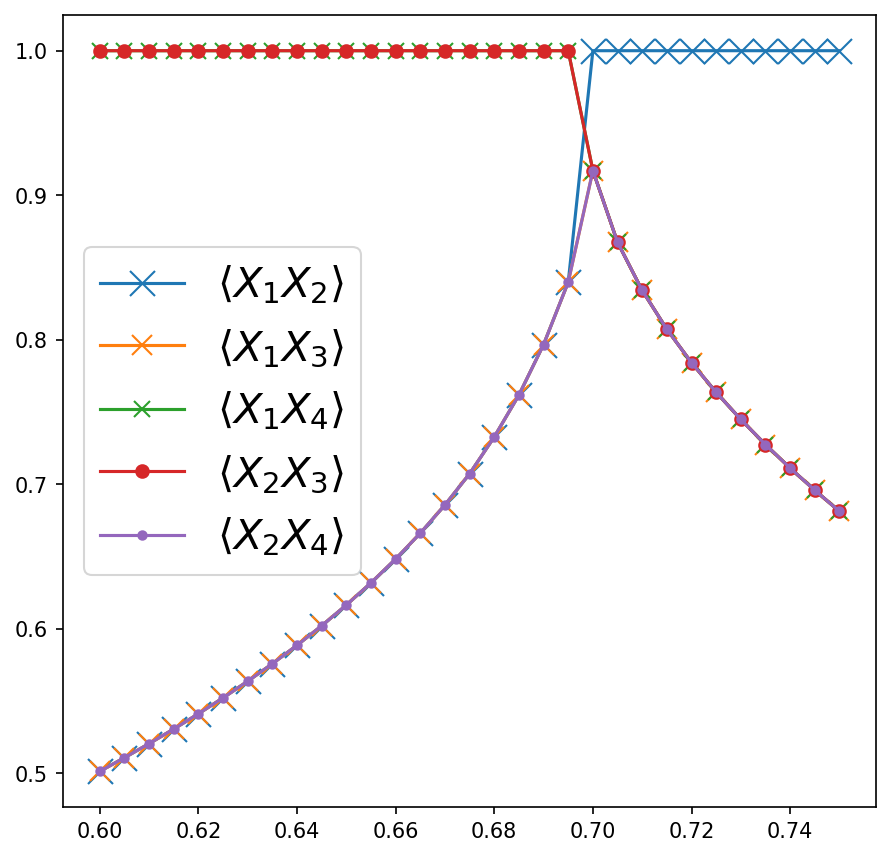

In [30]:
pyplot.figure(figsize=(7,7),dpi=150)
#pyplot.plot(rng,lam1234s,'.',label='$\langle X_1X_2X_3X_4 \\rangle$')

#pyplot.plot(rng,np.abs(lam1s),'X-',label='$\langle X_1 \\rangle$',markersize=10)
#pyplot.plot(rng,np.abs(lam2s),'X-',label='$\langle X_2 \\rangle$',markersize=6)


pyplot.plot(rng,np.abs(lam12s),'x-',label='$\langle X_1X_2 \\rangle$',markersize=12)
pyplot.plot(rng,np.abs(lam13s),'x-',label='$\langle X_1X_3 \\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam14s),'x-',label='$\langle X_1X_4 \\rangle$',markersize=8)


pyplot.plot(rng,np.abs(lam23s),'o-',label='$\langle X_2X_3 \\rangle$',markersize=6)
pyplot.plot(rng,np.abs(lam24s),'o-',label='$\langle X_2X_4 \\rangle$',markersize=4)
#pyplot.plot(rng,[1]*len(rng))
#pyplot.plot(rng[-25:],k*np.array(rng[-25:])+d,label='3.3399*p - 0.68003')
pyplot.legend(prop={'size':20})
pyplot.show()

In [112]:
lam1ss=[]
lam2ss=[]
lam12ss=[]
lam13ss=[]
lam14ss=[]
lam34ss=[]
lam24ss=[]
lam23ss=[]
lam1234ss=[]
dims=[]

Z = np.array([[1,0],[0,-1]])
X = np.array([[0,1],[1,0]])
A1 = np.array([[0.3,0.4],[0.1,0.2]])
A2 = np.array([[0.2,0.1],[0.3,0.4]])
B = np.zeros([1,1,16])
B[0,0] =(linalg.expm(0.1*np.kron(Z+A2,Z+A1))).reshape([16,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 15
MPS.construct_from_tensor_list([B,B])

rng = np.arange(4,4.1,0.1)
for p1 in np.arange(0.,.01,0.05): 
    lam1s=[]
    lam12s=[]
    lam13s=[]
    lam14s=[]
    lam1234s=[]
    lam34s=[]
    lam24s=[]
    lam23s=[]
    lam2s=[]
    
    
    for p2 in rng:
        trans = funcs.single_trans_2layers_df(h=p2,f1='X',f2 = 'Z',perm=True)
        MPO = iMPS.iMPO()
        MPO.construct_from_tensor_list([trans,trans])

        MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=15)
        MPS_power2.update(100,1e-5,1e-6)  
        
        dims.append(MPS_power2.MPS2.chi[0])
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
        lam12 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
        lam13 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)
        lam14 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO1234,MPS_power2.MPS2)
        lam1234 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO1,MPS_power2.MPS2)
        lam1 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO2,MPS_power2.MPS2)
        lam2 = strap.calculate_eig()
        
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO24,MPS_power2.MPS2)
        lam24 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO34,MPS_power2.MPS2)
        lam34 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO23,MPS_power2.MPS2)
        lam23 = strap.calculate_eig()
    
        lam12s.append(lam12)
        lam13s.append(lam13)
        lam14s.append(lam14)
        lam1234s.append(lam1234)
        lam1s.append(lam1)
        lam2s.append(lam2)
        lam34s.append(lam34)
        lam24s.append(lam24)
        lam23s.append(lam23)
        print(p2)

    lam12ss.append(lam12s)
    lam13ss.append(lam13s)
    lam14ss.append(lam14s)
    lam1234ss.append(lam1234s)
    lam1ss.append(lam1s)
    lam2ss.append(lam2s)
    lam34ss.append(lam34s)
    lam24ss.append(lam24s)
    lam23ss.append(lam23s)
  

4.0


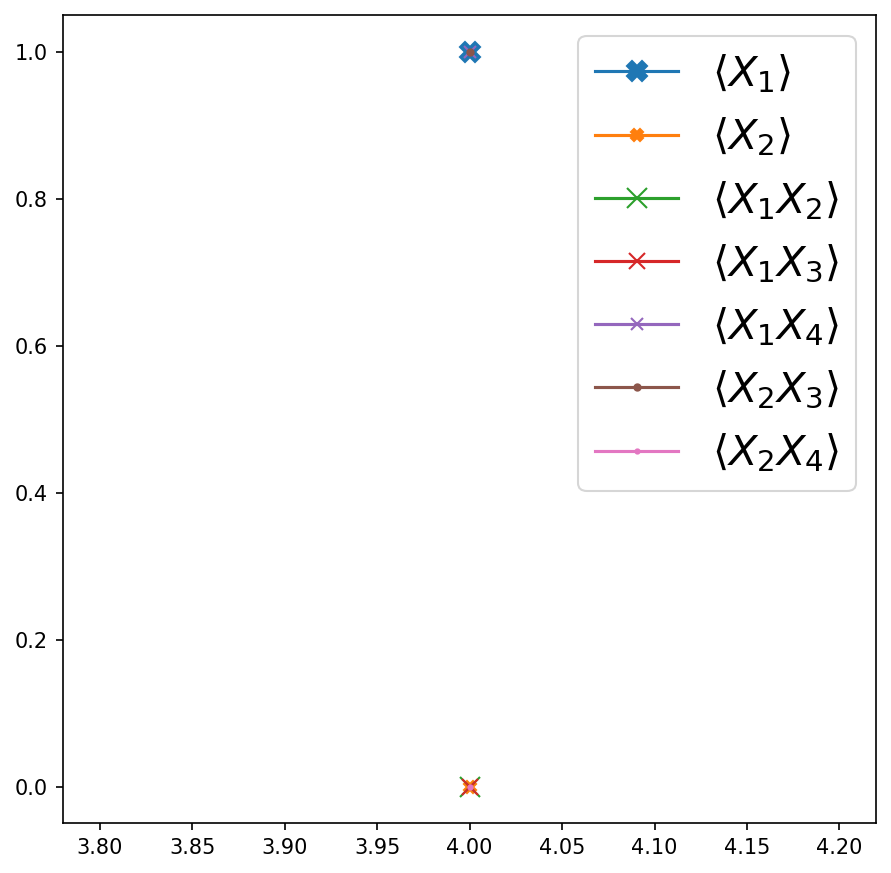

In [113]:
pyplot.figure(figsize=(7,7),dpi=150)
#pyplot.plot(rng,lam1234s,'.',label='$\langle X_1X_2X_3X_4 \\rangle$')

pyplot.plot(rng,np.abs(lam1s),'X-',label='$\langle X_1 \\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam2s),'X-',label='$\langle X_2 \\rangle$',markersize=6)


pyplot.plot(rng,np.abs(lam12s),'x-',label='$\langle X_1X_2 \\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam13s),'x-',label='$\langle X_1X_3 \\rangle$',markersize=8)
pyplot.plot(rng,np.abs(lam14s),'x-',label='$\langle X_1X_4 \\rangle$',markersize=6)


pyplot.plot(rng,np.abs(lam23s),'.-',label='$\langle X_2X_3 \\rangle$',markersize=6)
pyplot.plot(rng,np.abs(lam24s),'.-',label='$\langle X_2X_4 \\rangle$',markersize=4)
#pyplot.plot(rng,[1]*len(rng))
#pyplot.plot(rng[-25:],k*np.array(rng[-25:])+d,label='3.3399*p - 0.68003')
pyplot.legend(prop={'size':20})
pyplot.show()

In [5]:
strap = iMPS.strap(MPS_power2.MPS2,None,MPS_power2.MPS2)

strap14 = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)

strap12 = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)

strap1234 = iMPS.strap(MPS_power2.MPS2,MPO1234,MPS_power2.MPS2)

strap34 = iMPS.strap(MPS_power2.MPS2,MPO34,MPS_power2.MPS2)
   
strap1 = iMPS.strap(MPS_power2.MPS2,MPO1,MPS_power2.MPS2)


strap2 = iMPS.strap(MPS_power2.MPS2,MPO2,MPS_power2.MPS2)


strap23 = iMPS.strap(MPS_power2.MPS2,MPO23,MPS_power2.MPS2)


strap123 = iMPS.strap(MPS_power2.MPS2,MPO123,MPS_power2.MPS2)

strap13 = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)


strap4 = iMPS.strap(MPS_power2.MPS2,MPO4,MPS_power2.MPS2)


In [6]:
dim = MPS_power2.MPS2.chi[0]

V = strap.gram_matrix()
V = V.reshape([dim,dim])

V1 = strap1.gram_matrix().reshape([dim,dim])

V4 = strap4.gram_matrix().reshape([dim,dim])

V14 = strap14.gram_matrix().reshape([dim,dim])

V23 = strap23.gram_matrix().reshape([dim,dim])

V12 = strap12.gram_matrix().reshape([dim,dim])

V13 = strap13.gram_matrix().reshape([dim,dim])


V34 = strap34.gram_matrix().reshape([dim,dim])


In [8]:
print(V12@V13)

[[1.+0.j]]


In [9]:
print(V13@V12)

[[1.+0.j]]


In [109]:
print(V14@V23)

[[-2.50000000e-01-6.48781874e-20j  2.22044605e-16+6.40217563e-25j
  -4.30211422e-16-2.53272601e-23j  2.63677968e-16-4.88898336e-26j]
 [ 2.22044605e-16+1.98562878e-24j  2.50000000e-01+6.48778080e-20j
  -4.55191440e-15+3.65259913e-22j  6.93889390e-15+8.56937455e-24j]
 [-4.02455846e-16+2.43257513e-23j -4.19109192e-15-3.70672774e-22j
  -2.50000000e-01-6.48963523e-20j  6.55031585e-15-3.31785051e-22j]
 [ 2.22044605e-16+4.86943416e-24j  6.96664948e-15+2.03364613e-24j
   6.48092691e-15+3.32671727e-22j  2.50000000e-01+6.49056257e-20j]]


In [110]:
print(V23@V14)

[[-2.50000000e-01-6.48781874e-20j  2.22044605e-16-2.00228656e-24j
  -4.30211422e-16-2.53272601e-23j  1.80411242e-16-4.86896263e-24j]
 [ 1.66533454e-16-6.46792111e-25j  2.50000000e-01+6.48778080e-20j
  -4.21884749e-15+3.70656088e-22j  6.93889390e-15+8.56937455e-24j]
 [-4.02455846e-16+2.43257513e-23j -4.49640325e-15-3.65227510e-22j
  -2.50000000e-01-6.48963523e-20j  6.49480469e-15-3.32570157e-22j]
 [ 2.77555756e-16+4.44223800e-26j  6.96664948e-15+2.03364613e-24j
   6.56419363e-15+3.31715427e-22j  2.50000000e-01+6.49056257e-20j]]
